<a href="https://colab.research.google.com/github/Link-08/Lab-Activity-Titanic-Dataset/blob/main/lab2_titanic_diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Data Cleaning and Visualization of Titanic Dataset

## **Part 1: Data Cleaning**

### **Step 1: Load the Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Step 2: Understand the Data**

In [6]:
df.info()

df.describe()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### **Step 3: Check for Missing Values**

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### **Step 4: Handle Missing Values**

In [14]:
df["Age"] = df["Age"].fillna(df["Age"].median())

if "Cabin" in df.columns:
    df.drop(columns=["Cabin"], inplace=True)
else:
    print("Cabin column not found")

Cabin column not found


### **Step 5: Remove Duplicates**

In [18]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


### **Step 6: Fix Data Types**

In [19]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

### **Step 7: Save the Cleaned Dataset**

In [20]:
df.to_csv("titanic_cleaned.csv", index=False)

## **Part 2: Data Visualization**

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Bar Plot of Survival Count**

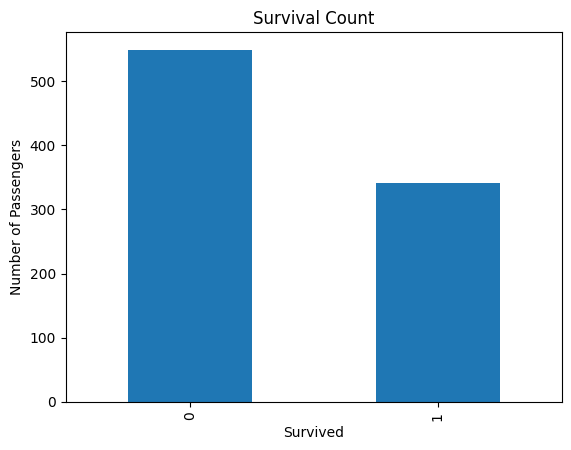

In [23]:
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

### **2. Histogram of Age Distribution**

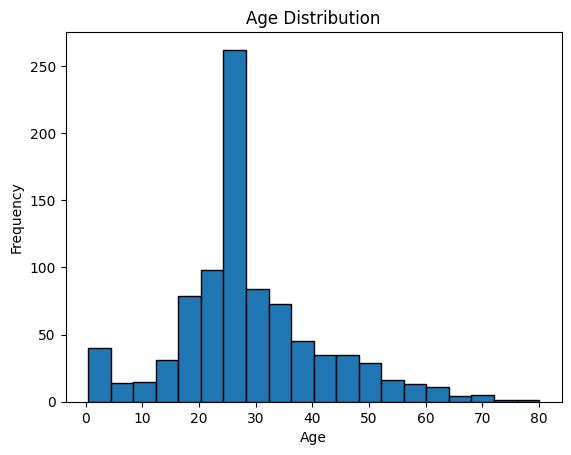

In [24]:
df["Age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

### **3. Survival Rate by Gender**

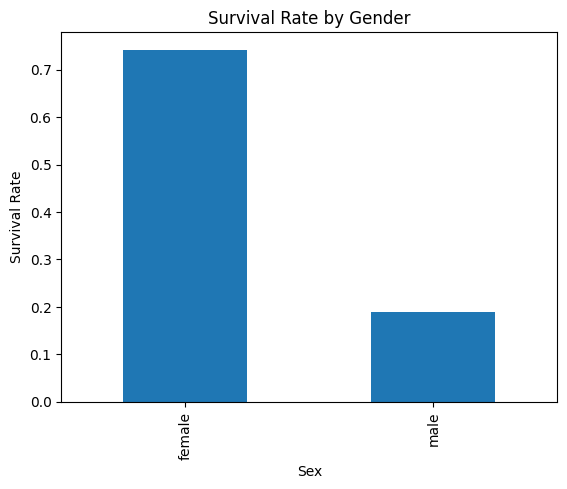

In [34]:
if "Sex" in df.columns and "Survived" in df.columns:
    df["Survived"] = df["Survived"].astype(int)
    df.groupby("Sex")["Survived"].mean().plot(kind="bar")
    plt.title("Survival Rate by Gender")
    plt.ylabel("Survival Rate")
    plt.show()
else:
    print("Column 'Sex' or 'Survived' not found in the dataset.")

### **Question 1: Steps in Cleaning the Dataset**


1. Loaded the dataset using Pandas to inspect its structure.
2. Checked for missing values using `df.isnull().sum()` to identify columns with missing data.
3. Handled missing values:
   - Age: Filled missing values with the median age since age is important for survival analysis.
   - Cabin: Dropped the column because it had too many missing values.
4. Removed duplicates to avoid biased analysis.
5. Fixed data types:
   - Converted Survived and Pclass to categorical types for better efficiency.
6. Saved the cleaned dataset for further analysis.

### **Why These Cleaning Methods?**

- Filling missing Age values with the median: The median is less affected by outliers than the mean.
- Dropping the Cabin column: Too many missing values make it unreliable.
- Removing duplicates: Ensures we are working with unique passenger data.
- Converting categorical columns: Helps in better analysis and memory optimization.

## **Data Analyses**

### **Does Having More Siblings/Spouses Aboard Help You Survive?**

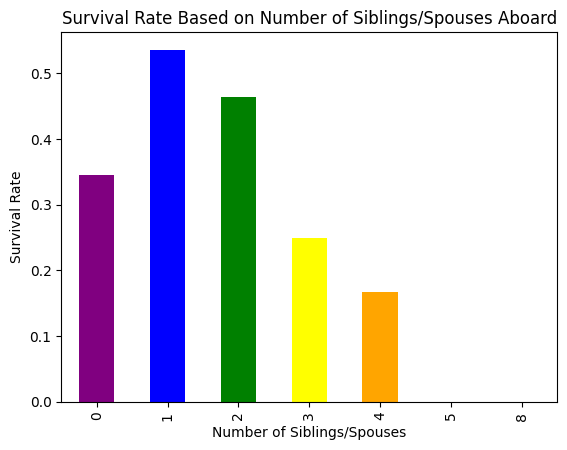

In [38]:
df.groupby("SibSp")["Survived"].mean().plot(kind="bar", color=["purple", "blue", "green", "yellow", "orange", "red"])
plt.title("Survival Rate Based on Number of Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Survival Rate")
plt.show()

**Insight:**

- If you were alone, you had a decent survival rate.
- If you had 1-2 Siblings/Spouses, your survival chances were still okay.
- If you had 3+ Siblings/Spouses, survival dropped significantly.

### **Does Paying More for a Ticket Buy You More Luck?**

<ipython-input-41-804d40389ca8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Survived"], y=df["Fare"], inner="quartile", palette="muted")


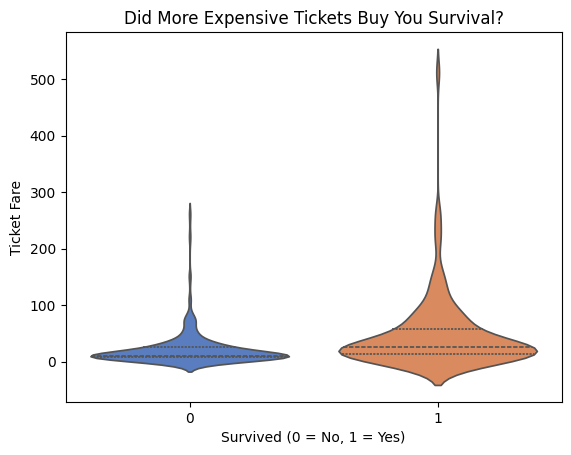

In [41]:
sns.violinplot(x=df["Survived"], y=df["Fare"], inner="quartile", palette="muted")
plt.title("Did More Expensive Tickets Buy You Survival?")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Ticket Fare")
plt.show()

**Insight:**
- People who paid higher fares had a higher survival rate.
- People who paid very little… well, let’s just say the iceberg didn’t care.
- Some outliers paid A LOT and still didn’t make it.

### **Note:**
*Some of the code used for the visual representation in this notebook was generated with the help of ChatGPT.*